# Error correction examples

In [1]:
from error_correction_sim import codes, error_models, decoders, utils, visualizer, app

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 5]

## Examples with no measurement error

### Five qubit code with lookup decoder

Initialize the parameters, the code, error model and decoder

In [3]:
p_qubit = 0.2 # Probability of qubit error

my_code = codes.FiveQubitCode()
my_q_errormodel = error_models.PhaseFlipError(p_qubit)
my_decoder = decoders.LookupDecoder()

Get one instance of errors

In [4]:
pauli_qubit_errors = my_q_errormodel.error_str(my_code.no_qubits)
qubit_errors = utils.pauli_to_binary(pauli_qubit_errors)

Obtain error syndrome and use decoder to find the correction

In [5]:
syndrome, final_state = utils.errors2syndrome(my_code, qubit_errors)
correction = my_decoder.decode_wrapper(my_code, syndrome)

Check if the decoding was succesful

In [6]:
print("Error instance: " + final_state)
print("Recovery oper.: " + correction)
print("Success of decoding:", utils.get_success(correction, final_state, my_code))

Error instance: IIZII
Recovery oper.: IIZII
Success of decoding: True


Can also do many repititions of the above operations to find the logical error rate in one go

In [7]:
print("Logical error rate:", app.logical_error_rate(my_code, my_decoder, my_q_errormodel, p_qubit, reps = 100))

Logical error rate: 0.27


### Surface code with min-weight perfect matching decoder

Initialize the parameters, the code, error model and decoder

In [8]:
code_size = 4 # Size of surface code (no. of plaquettes in each dimension)
p_qubit = 0.1 # Probability of qubit error

my_code = codes.SurfaceCode(code_size)
my_q_errormodel = error_models.DepolarizingError(p_qubit)
my_decoder = decoders.MWPMDecoder()

Get one instance of errors

In [9]:
pauli_qubit_errors = my_q_errormodel.error_str(my_code.no_qubits)
qubit_errors = utils.pauli_to_binary(pauli_qubit_errors)

Obtain error syndrome and use decoder to find the correction

In [10]:
syndrome, final_state = utils.errors2syndrome(my_code, qubit_errors)
correction = my_decoder.decode_wrapper(my_code, syndrome, p_qubit)

Check if the decoding was succesful

In [11]:
print("Success of decoding:", utils.get_success(correction, final_state, my_code))

Success of decoding: True


Plot the surface code along with the final state with errors (red) and the correction applied (green)

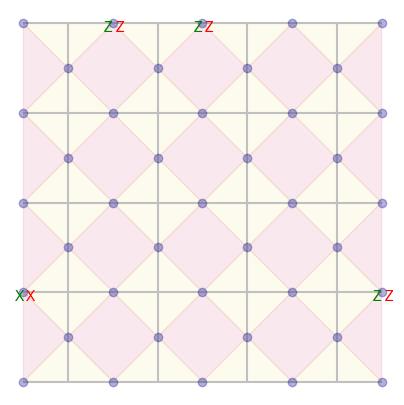

In [12]:
s = visualizer.SurfacePlot(code_size, final_state, correction)
s.plot_all(draw_anc_YN=False)

Can also do many repititions of the above operations to find the logical error rate in one go

In [13]:
print("Logical error rate:", app.logical_error_rate(my_code, my_decoder, my_q_errormodel, p_qubit, reps = 1000))

Logical error rate: 0.11099999999999999


## Examples with measurement error

### Surface code with MWPM decoder

Set parameters

In [14]:
code_size = 4 # Size of surface code
repetitions = 4 # Number of measurement repetition
p_qubit = 0.1 # Probability of qubit error
p_meas = 0.02 # Probability of measurement error

Initialize the objects for the surface code, depolarizing error, measurement error and decoder

In [15]:
my_code = codes.SurfaceCode(code_size)
my_q_errormodel = error_models.DepolarizingError(p_qubit)
my_m_errormodel = error_models.MeasurementError(p_meas)
my_decoder = decoders.MWPMDecoder()

Get one instance of errors

In [16]:
pauli_qubit_errors = my_q_errormodel.error_str(my_code.no_qubits, reps = repetitions)
qubit_errors = utils.pauli_to_binary(pauli_qubit_errors)
measurement_error = my_m_errormodel.m_errors(repetitions, len(my_code.stabilizers))

Find syndrome for the given instance of the errors

In [17]:
diff_syndrome, final_state = utils.errors2syndrome(my_code, qubit_errors, measurement_error)

Use decoder to determine a correction

In [18]:
correction = my_decoder.decode_wrapper(my_code, diff_syndrome, p_qubit, p_meas)
print("Correction success: " + str(utils.get_success(correction, final_state, my_code)))

Correction success: True


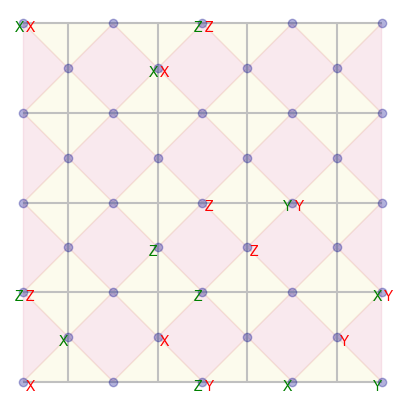

In [19]:
s = visualizer.SurfacePlot(code_size, final_state, correction)
s.plot_all(draw_anc_YN=False)

Can also do many repititions of the above operations to find the logical error rate in one go

In [20]:
print("Logical error rate:", 
      app.logical_error_rate(my_code, my_decoder, my_q_errormodel, p_qubit, my_m_errormodel, p_meas, m_reps = repetitions, reps=100))

Logical error rate: 0.47
